In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from lazypredict.Supervised import LazyRegressor
import matplotlib.pyplot as plt
import sklearn.preprocessing as skp
import sklearn.metrics as skm
import sklearn.linear_model as skl
import sklearn.ensemble as ske
%matplotlib inline

In [2]:
data_test = pd.read_csv("../data/prepared_test2.csv", sep=";", index_col=0
                        ).sort_index()
data_test.head()

,dteday,season,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
7,07.01.2011,1,0,1,0,1,7.86,0.21,74.80,0.17,...,0,0,0,0,0,1,0,0,1,0
11,11.01.2011,1,0,1,0,1,6.76,0.19,102.95,0.12,...,0,0,1,0,0,0,0,0,1,0
14,14.01.2011,1,0,1,0,1,6.43,0.19,80.67,0.13,...,0,0,0,0,0,1,0,1,0,0
16,16.01.2011,1,0,1,0,0,9.27,0.23,72.56,0.19,...,1,0,0,0,0,0,0,1,0,0
18,18.01.2011,1,0,1,0,1,8.67,0.23,129.25,0.15,...,0,0,1,0,0,0,0,0,1,0


In [3]:
data_train = pd.read_csv("../data/prepared_train.csv",sep=";", index_col=0
                         ).sort_index()
data_train.head()

,dteday,season,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
instant,,,,,,,,,,,,,,,,,,,,,
1,01.01.2011,1,0,1,0,0,13.77,0.36,120.87,0.16,...,0,0,0,0,0,0,1,0,1,0
2,02.01.2011,1,0,1,0,0,14.54,0.35,104.41,0.25,...,1,0,0,0,0,0,0,0,1,0
3,03.01.2011,1,0,1,0,1,7.85,0.19,65.59,0.25,...,0,1,0,0,0,0,0,1,0,0
4,04.01.2011,1,0,1,0,1,8.00,0.21,88.57,0.16,...,0,0,1,0,0,0,0,1,0,0
5,05.01.2011,1,0,1,0,1,9.08,0.23,65.54,0.19,...,0,0,0,1,0,0,0,1,0,0


## Initial Model Selection ##

In [4]:
scaler = skp.StandardScaler()

X_train = scaler.fit_transform(X=data_train.drop(
     columns=["dteday", "casual", "registered", "cnt"]))

Y_train = data_train["cnt"].copy()


X_test = scaler.transform(data_test.drop(
    columns=["dteday", "casual", "registered", "cnt"]))

Y_test = data_test["cnt"].copy()

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, predictions=True)
models, pred = reg.fit(X_train, X_test, Y_train, Y_test)

In [6]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.86,0.88,678.44,0.31
LGBMRegressor,0.83,0.86,736.96,0.18
ExtraTreesRegressor,0.83,0.86,738.71,0.54
HistGradientBoostingRegressor,0.82,0.85,749.33,1.10
RandomForestRegressor,0.81,0.84,771.69,1.03
BaggingRegressor,0.80,0.83,801.52,0.14
XGBRegressor,0.77,0.81,849.12,0.14
AdaBoostRegressor,0.77,0.80,867.20,0.21
RANSACRegressor,0.74,0.78,909.56,0.14


In [7]:
def actualVsPredictChart(true_v, pred_v):
    data = {'Actual': true_v, 'Predicted': pred_v}
    df = pd.DataFrame(data)

    # Create a lineplot with Seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))

    sns.lineplot(data=df, markers=False)

    plt.title('Actual vs. Predicted Values')
    plt.xlabel('Data Points')
    plt.ylabel('Values')

    plt.show()

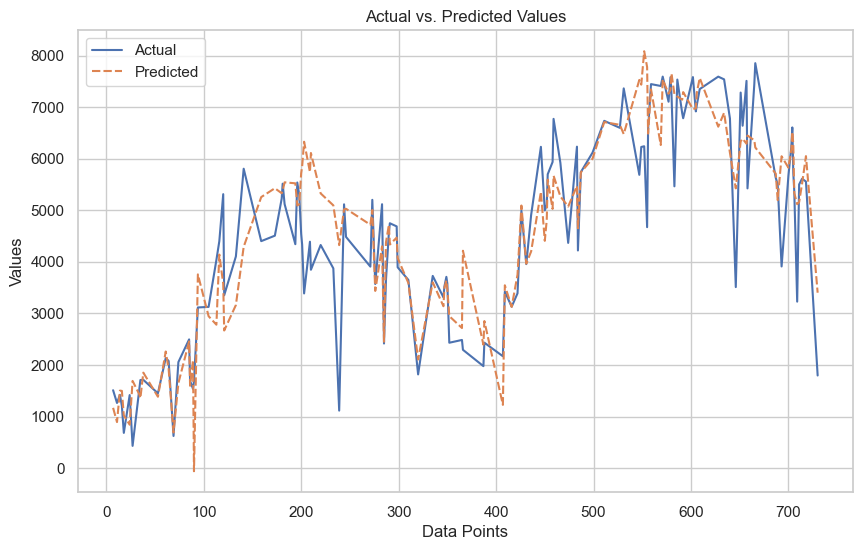

In [8]:
actualVsPredictChart(Y_test, pred["PassiveAggressiveRegressor"].to_numpy())

## Model Tuning ##

In [29]:
def eval_model(scaling_method):

    def eval_model_params(C, epsilon):

        # Fit Model
        nonlocal X_train, Y_train, X_test, X_train
        #model = skl.PassiveAggressiveRegressor(C=C, epsilon=epsilon)
        model = ske.GradientBoostingRegressor(loss="squared_error")
        model.fit(X_train, Y_train)

        # Get Model Scores
        sc = model.score(X_train, Y_train)
        y_pred = model.predict(X_test)
        r2 = skm.r2_score(Y_test, y_pred)
        rmse = np.sqrt(skm.mean_squared_error(Y_test, y_pred))
        mae = skm.mean_absolute_error(Y_test, y_pred)

        # Return Values
        return [C, epsilon, sc, r2, rmse, mae, model, Y_test, y_pred]

    # Data Scaling
    X_train = scaling_method.fit_transform(X=data_train.drop(columns=["dteday", "casual", "registered", "cnt"]))
    Y_train = data_train["cnt"].copy()
    X_test = scaling_method.transform(data_test.drop(columns=["dteday", "casual", "registered", "cnt"]))
    Y_test = data_test["cnt"].copy()

    # Parameters
    Cs = [1.5**x for x in range(-5, 5)]
    epsilons = [0.05*x for x in range(201)]

    results = pd.DataFrame(
        columns=["method", "C", "epsilon", "score", "R squared", "RMSE", "MAE", "model", "ytest", "ypred"])
    #for C in Cs:
    #    for eps in epsilons:
    eval_params = eval_model_params(0, 0)
    results.loc[len(results)] = [repr(scaling_method), *eval_params]
    return results.sort_values("R squared", ascending=False).iloc[0].copy()

In [30]:
list_scalers = [
    skp.KBinsDiscretizer,
    skp.MaxAbsScaler,
    skp.MinMaxScaler,
    skp.Normalizer,
    skp.PolynomialFeatures,
    skp.QuantileTransformer,
    skp.StandardScaler,
    skp.SplineTransformer,
    skp.PowerTransformer
]

results = pd.DataFrame(columns=["method", "C", "epsilon", "score", "R squared", "RMSE", "MAE", "model", "ytest", "ypred"])

for func in list_scalers:
    print(f"Using method: {repr(func)}")
    results.loc[len(results)] = eval_model(scaling_method=func())

Using method: <class 'sklearn.preprocessing._discretization.KBinsDiscretizer'>
Using method: <class 'sklearn.preprocessing._data.MaxAbsScaler'>
Using method: <class 'sklearn.preprocessing._data.MinMaxScaler'>
Using method: <class 'sklearn.preprocessing._data.Normalizer'>
Using method: <class 'sklearn.preprocessing._polynomial.PolynomialFeatures'>
Using method: <class 'sklearn.preprocessing._data.QuantileTransformer'>
Using method: <class 'sklearn.preprocessing._data.StandardScaler'>
Using method: <class 'sklearn.preprocessing._polynomial.SplineTransformer'>
Using method: <class 'sklearn.preprocessing._data.PowerTransformer'>


In [31]:
res_y_test = results.sort_values("MAE", ascending=True).iloc[0, 8]
res_y_pred = results.sort_values("MAE", ascending=True).iloc[0, 9]

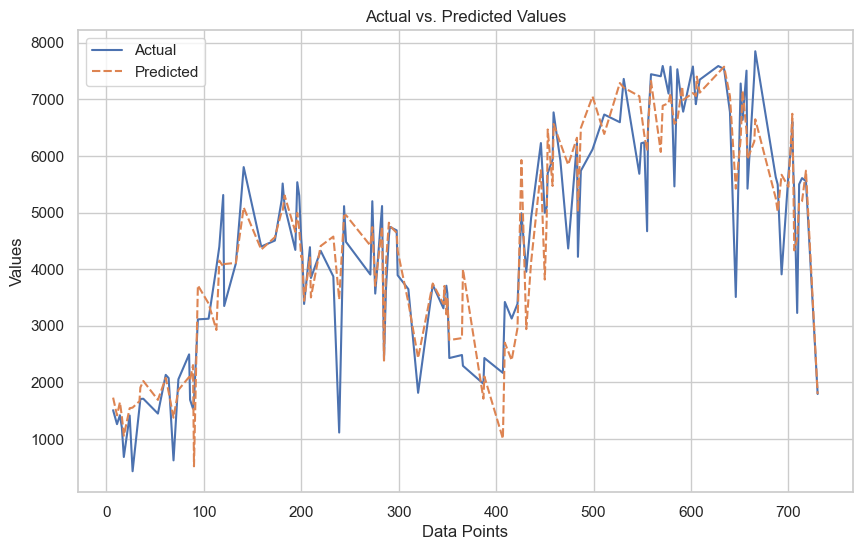

In [32]:
actualVsPredictChart(res_y_test, res_y_pred)

<Axes: xlabel='cnt'>

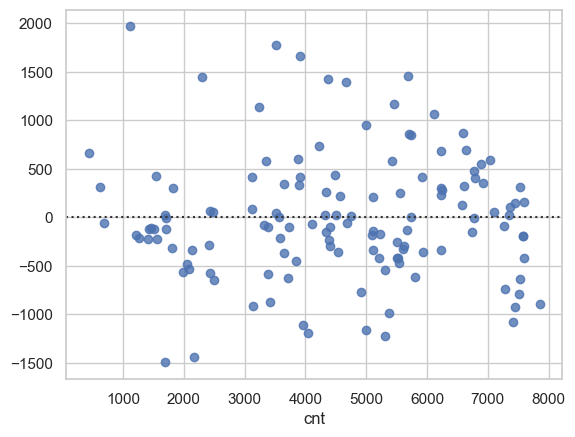

In [33]:
sns.residplot(x=res_y_test, y=res_y_pred)

Das originale Modell hatte einen R² von 0.6 -> 0.88 <br>
MAE war ~802 -> 507

In [34]:
results.iloc[:, :8].sort_values("MAE")

,method,C,epsilon,score,R squared,RMSE,MAE,model
6,StandardScaler(),0,0,0.96,0.88,675.83,504.83,([DecisionTreeRegressor(criterion='friedman_ms...
1,MaxAbsScaler(),0,0,0.96,0.88,676.35,505.53,([DecisionTreeRegressor(criterion='friedman_ms...
5,QuantileTransformer(),0,0,0.96,0.88,679.51,506.63,([DecisionTreeRegressor(criterion='friedman_ms...
8,PowerTransformer(),0,0,0.96,0.88,678.40,507.41,([DecisionTreeRegressor(criterion='friedman_ms...
2,MinMaxScaler(),0,0,0.96,0.88,679.92,508.24,([DecisionTreeRegressor(criterion='friedman_ms...
7,SplineTransformer(),0,0,0.97,0.88,685.65,519.95,([DecisionTreeRegressor(criterion='friedman_ms...
4,PolynomialFeatures(),0,0,0.97,0.85,756.48,552.41,([DecisionTreeRegressor(criterion='friedman_ms...
3,Normalizer(),0,0,0.95,0.84,777.88,580.60,([DecisionTreeRegressor(criterion='friedman_ms...
0,KBinsDiscretizer(),0,0,0.69,0.53,1346.06,1107.16,([DecisionTreeRegressor(criterion='friedman_ms...
